# Fig11. Distribution of projects according to funding received.

#### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

from collections import Counter

def read_csv(path):
    """
    :param path: of desir the xlsx file
    :return: String that contains all project descriptions
    """
    df = pd.read_csv(path)
    filtered_df = df.replace(np.nan, 0, regex=True)
    
    
    return filtered_df

#### Define projects data path

In [2]:
file_path = "data/mapeo_proyectos.csv"

#### Define function to clean projects data

In [3]:
def prepare_data(data):
    data = read_csv(file_path)
    data["Financiación"] = pd.to_numeric(data["Financiación"], errors='coerce')
    mini = data[["ID proyecto","Financiación"]]
    mini = mini.groupby(['ID proyecto'])["Financiación"].apply(list).reset_index(name='Financiación')
    new_fins = [fin[0] for fin in mini["Financiación"]]
    mini["Financiación"] = new_fins
    mini = mini.drop(["ID proyecto"], axis=1)
    grp = mini.groupby(pd.cut(mini["Financiación"], np.arange(0, 250000, 10000))).agg({'Financiación':['count']})
    grp["pcts"] = grp.apply(lambda x:100 * x / float(x.sum()))
    grp['cum_sum'] = grp['pcts'].cumsum()
    grp.reset_index(level=[0], inplace=True)
    grp.columns = grp.columns.droplevel(1)
    grp.columns = ["rango","count","pcts","pcts_sum"]
    return grp

#### Run program

In [4]:
proyectos = read_csv(file_path)
df2 = prepare_data(proyectos)

#### Print graph

<Figure size 432x288 with 0 Axes>

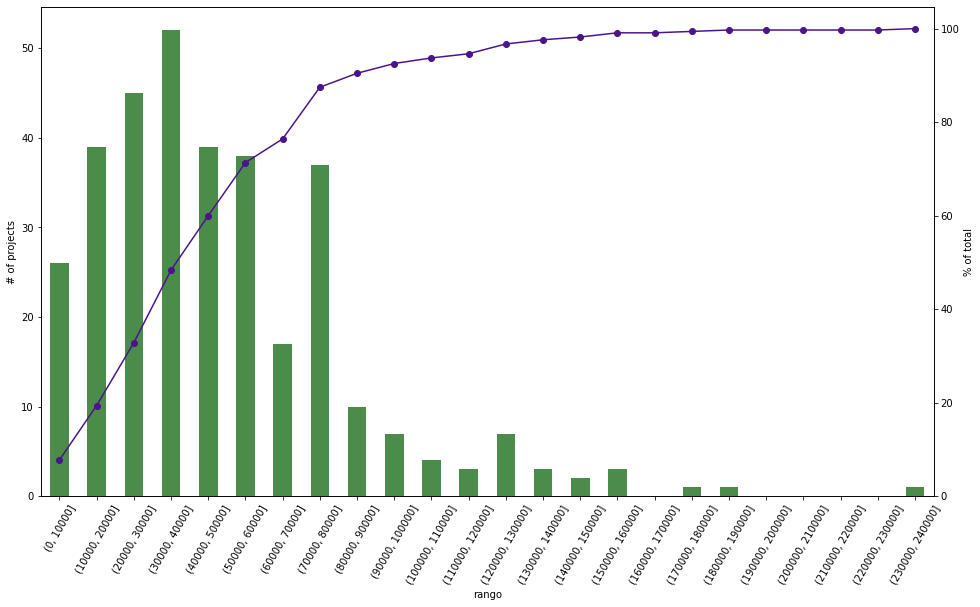

In [5]:
plt.figure()
ax1 = df2[['rango', 'count']].plot(x='rango', kind="bar", figsize=(16,9), legend=False, color = '#4c8c4a')
ax1.set_ylabel("# of projects")


ax2 = df2['pcts_sum'].plot(secondary_y=True, color='#4a148c', marker='o')
ax2.set_ylabel('% of total')
ax2.set_ylim(bottom=0)


plt.setp(ax1.xaxis.get_majorticklabels(), rotation=60)
# plt.title("Number of research projects and total funding across the whole analysed period (1993-2019)",fontsize=20,fontweight="bold")
plt.show()